# Explore here

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
import os
from sklearn.linear_model import LinearRegression

In [11]:
total_data = pd.read_csv("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/data/raw/medical_insurance_cost.csv")

total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Paso 2: Exploración y limpieza de datos

In [12]:
total_data.shape

(1338, 7)

In [13]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
total_data.duplicated().sum()

np.int64(1)

In [15]:
total_data = total_data.drop_duplicates(subset = total_data.columns)

#### Eliminar información irrelevante

No se puede eliminar información ya que todas las columnas aportan datos importantes

### Paso 3: Análisis de variables univariante

#### Análisis sobre variables categóricas

In [16]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


/var/folders/72/kf09dnsd1wb18f08628cdsxm0000gn/T/ipykernel_99267/3013765205.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


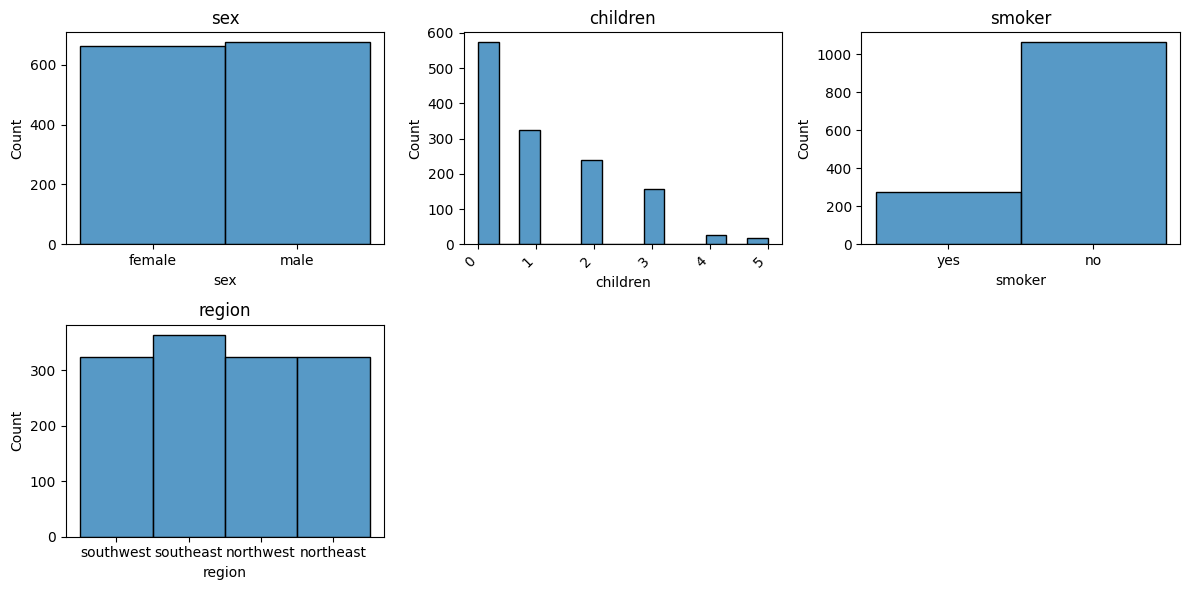

In [17]:
# Lista de columnas categóricas
categorical_variables = ["sex", "children", "smoker", "region"]

# Definir número de columnas y calcular el número de filas necesarias
num_cols = 3
num_rows = math.ceil(len(categorical_variables) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))

# Asegurar que axes sea siempre una matriz bidimensional
axes = axes.reshape(num_rows, num_cols) if num_rows > 1 else [axes]

col_index = 0
for row in range(num_rows):
    for col in range(num_cols):
        if col_index < len(categorical_variables):
            ax = axes[row][col]
            column_name = categorical_variables[col_index]

            # Graficar histograma
            sns.histplot(data=total_data, x=column_name, ax=ax)

            # Contar cuántas categorías hay en la variable
            num_categories = total_data[column_name].nunique()

            # Rotar etiquetas en X solo si hay más de 4 categorías
            if num_categories > 4:
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

            ax.set_title(column_name)  # Agregar título con el nombre de la columna
            col_index += 1
        else:
            fig.delaxes(axes[row][col])  # Eliminar gráfico vacío si hay menos de num_cols

plt.tight_layout()
plt.show()


- **sex**: vemos que el sexo de los beneficiarios del seguro médico está repartido prácticamente en partes iguales entre hombre y mujeres habiendo una ligera cantidad superior de mujeres.
- **children**: vemos que la mayoría de los clientes no tiene hijos y como ha medida que aumenta la cantidad disminuye drásticamente, están la mayoría de clientes entre 0 y 3 hijos los que están dentro de la seguro médico.
- **smoker**: la gran mayoría de los clientes no son fumadores.
- **region**: de todas las regiones analizadas vemos que los datos están repartidos de forma equitativa destacando ligeramente el sudoeste.

#### Análisis sobre variables numéricas

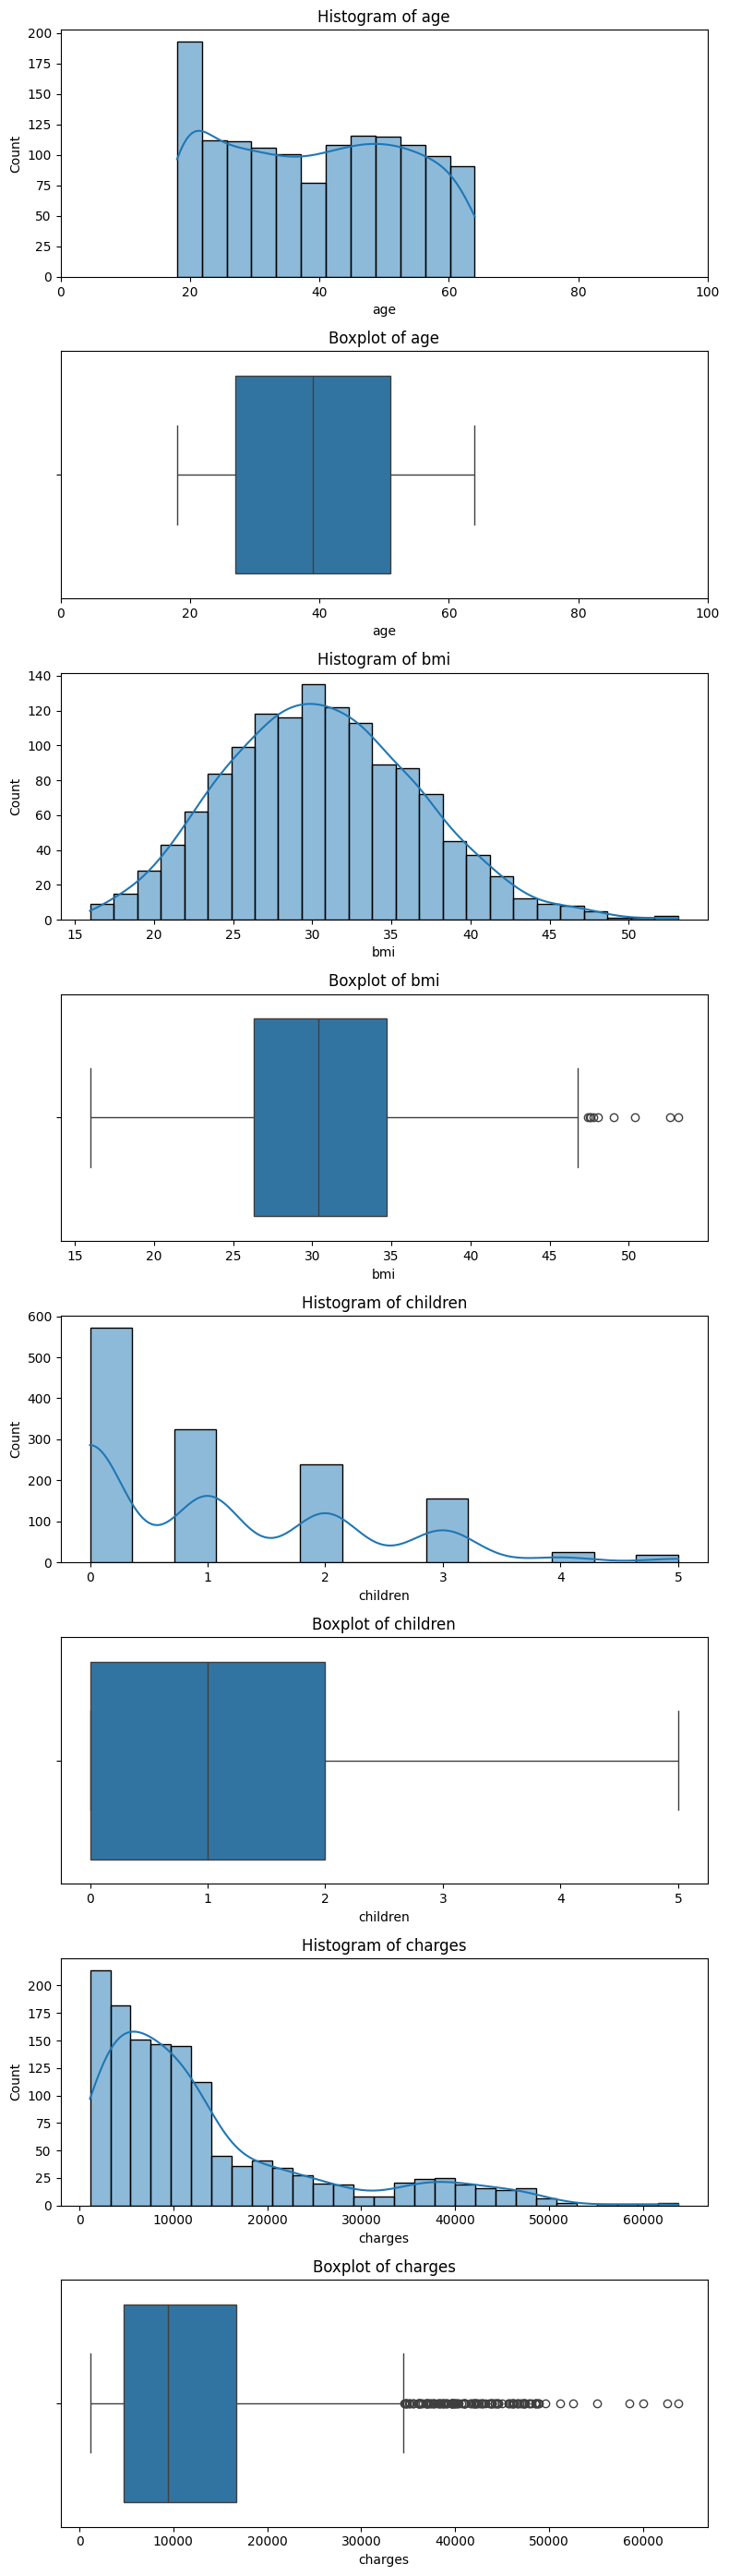

In [18]:
numericals_variables = ["age","bmi", "children", "charges"]

 # Crear la figura con 1 columnas y 2 filas por variable.
fig, axis = plt.subplots(len(numericals_variables) * 2, 1, figsize=(8, len(numericals_variables) * 7))
    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
x_limits = {
        'age': (0, 100),   # Rango para el histograma y el boxplot de columna1...
        'duration': (0, 2000),
        'campaign': (0, 20),
        'pdays': (0, 2000),
        # Añadir más columnas y rangos si es necesario...
    }
    # Iterar sobre cada columna del DataFrame
for i, col in enumerate(numericals_variables):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = total_data, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma
        # Boxplot en la segunda fila
        sns.boxplot(data = total_data, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot
plt.tight_layout()
plt.show()

Vemos que la distribución de la edad está entorno a 30 años, que la media de los clientes tienen 1 hijo y que la prima está en torno a los 10000 dólares.

### Paso 4: Análisis de variables multivariante

#### Análisis numérico-numérico

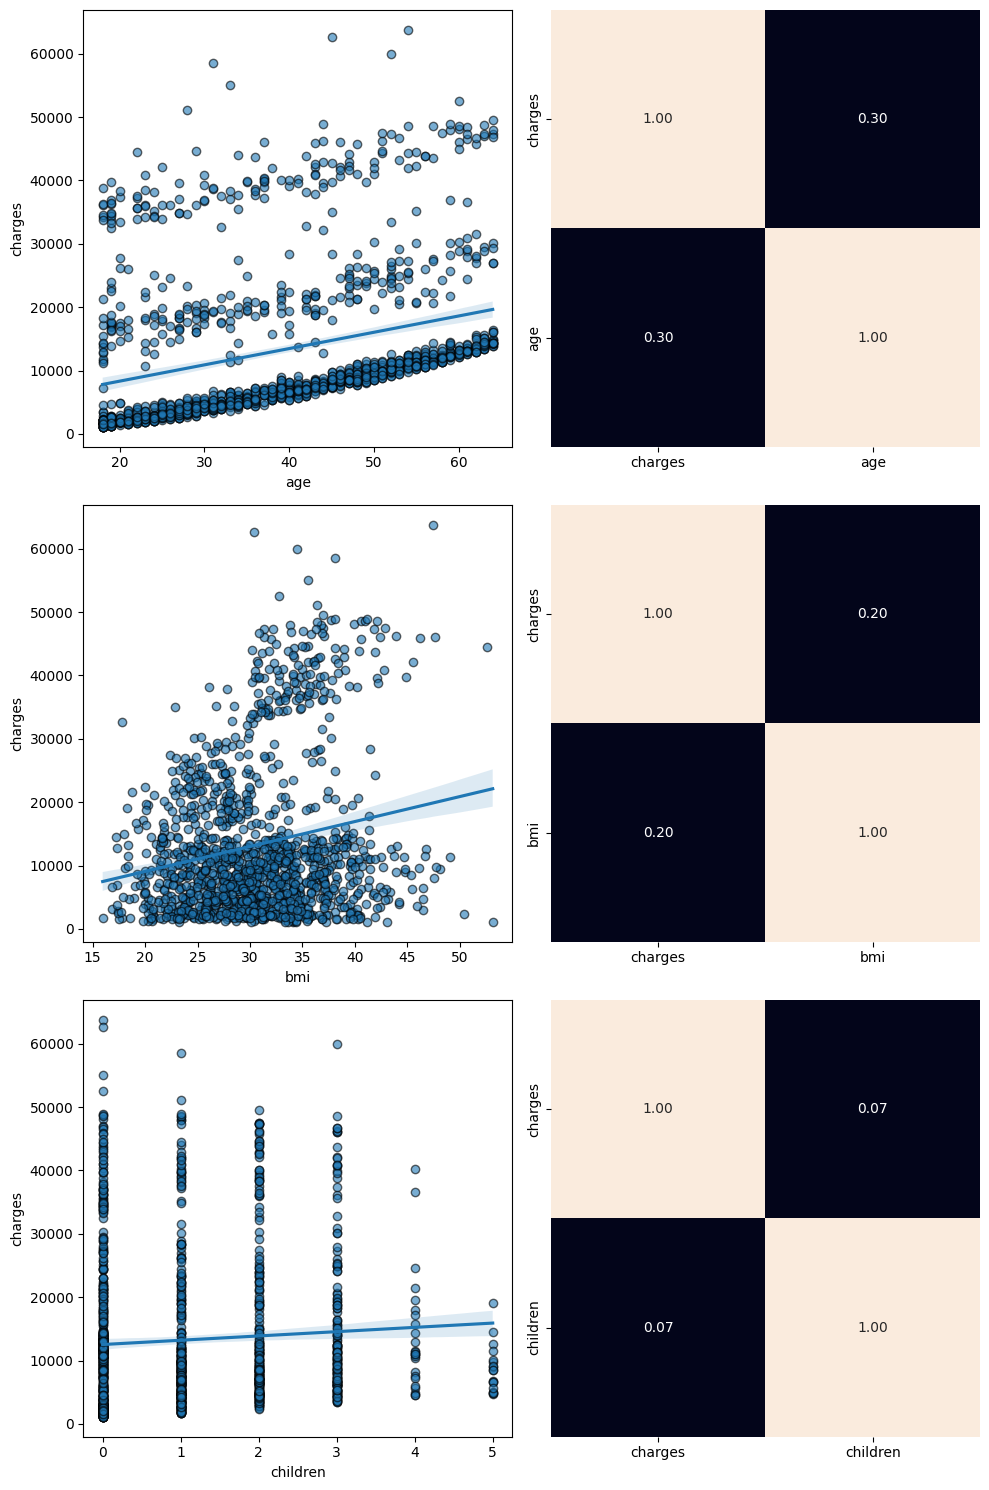

In [19]:
# Crear la variable objetivo
target = total_data["charges"]
numericals_variables_sin_target = ["age", "bmi", "children"]
# Crear la figura y los ejes
num_rows = len(numericals_variables_sin_target)
fig, axis = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))

# Crear gráficos para cada variable
for i, var in enumerate(numericals_variables_sin_target):
    sns.regplot(ax=axis[i, 0], data=total_data, x=var, y=target, scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
    sns.heatmap(total_data[[target.name, var]].corr(), annot=True, fmt=".2f", ax=axis[i, 1], cbar=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Vemos que hay una relación entre el aumento del precio y la edad, aunque la correlación es ligeramente baja.
- Vemos que hay una relación entre el aumento del precio y el bmi, aunque la correlación es ligeramenta baja.
- Vemos que la relación entre la cantidad de niños y el precio es prácticamente 0 aunque hay un ligero aumento a medida que la prima de seguro incluye más hijos.

children - bmi

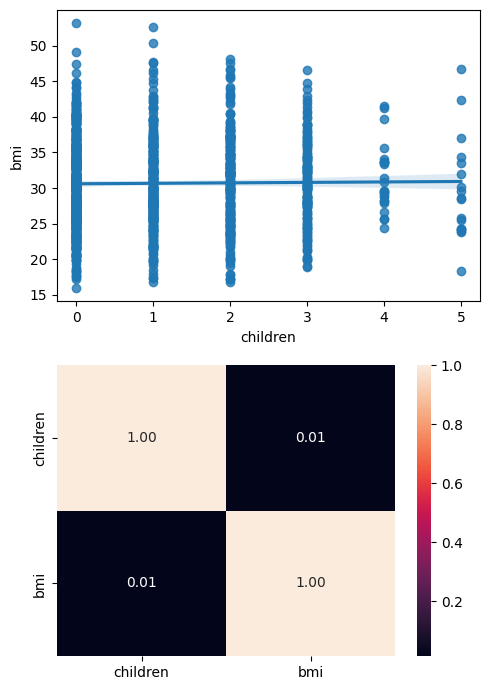

In [20]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = total_data, x = "children", y = "bmi")
sns.heatmap(total_data[["children", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

La correlación entre children y bmi es prácticamente 0, por lo que no hay correlación entre ellas.

#### Análisis categórico-categórico

In [21]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


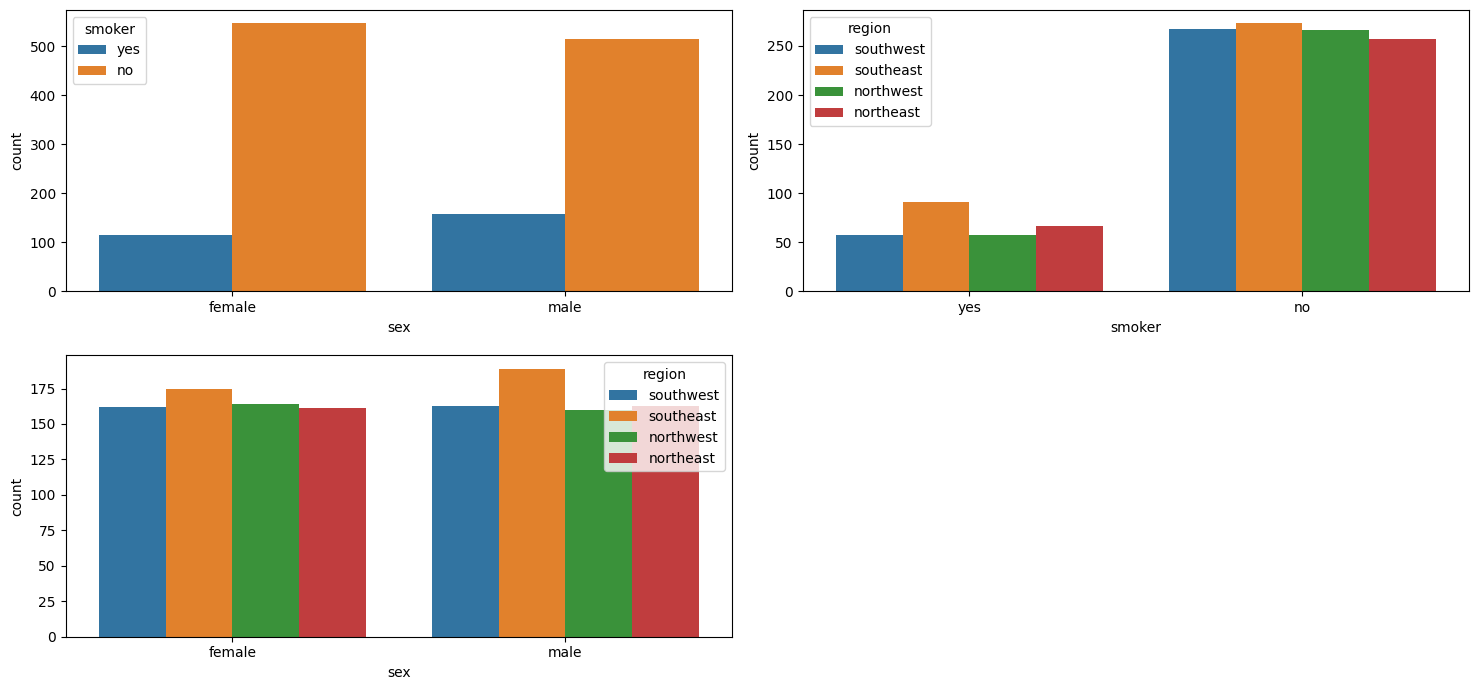

In [22]:
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = total_data, x = "sex", hue = "smoker")
sns.countplot(ax = axis[0, 1], data = total_data, x = "smoker", hue = "region")
sns.countplot(ax = axis[1, 0], data = total_data, x = "sex", hue = "region")

plt.tight_layout()
fig.delaxes(axis[1, 1])

plt.show()

- La mayoría no son fumadores, siendo ligeramente más fumadores los hombres que las mujeres.
- De los fumadores, destacan más lo que son del sudoeste.
- En cuanto a las regiones, las mujeres contactadas están repartidas más o menos de forma equitativa igual que los hombres siendo ligeramente superiores en ambos sexos los del sudoeste.

##### Combinaciones de la clase con varias predictoras

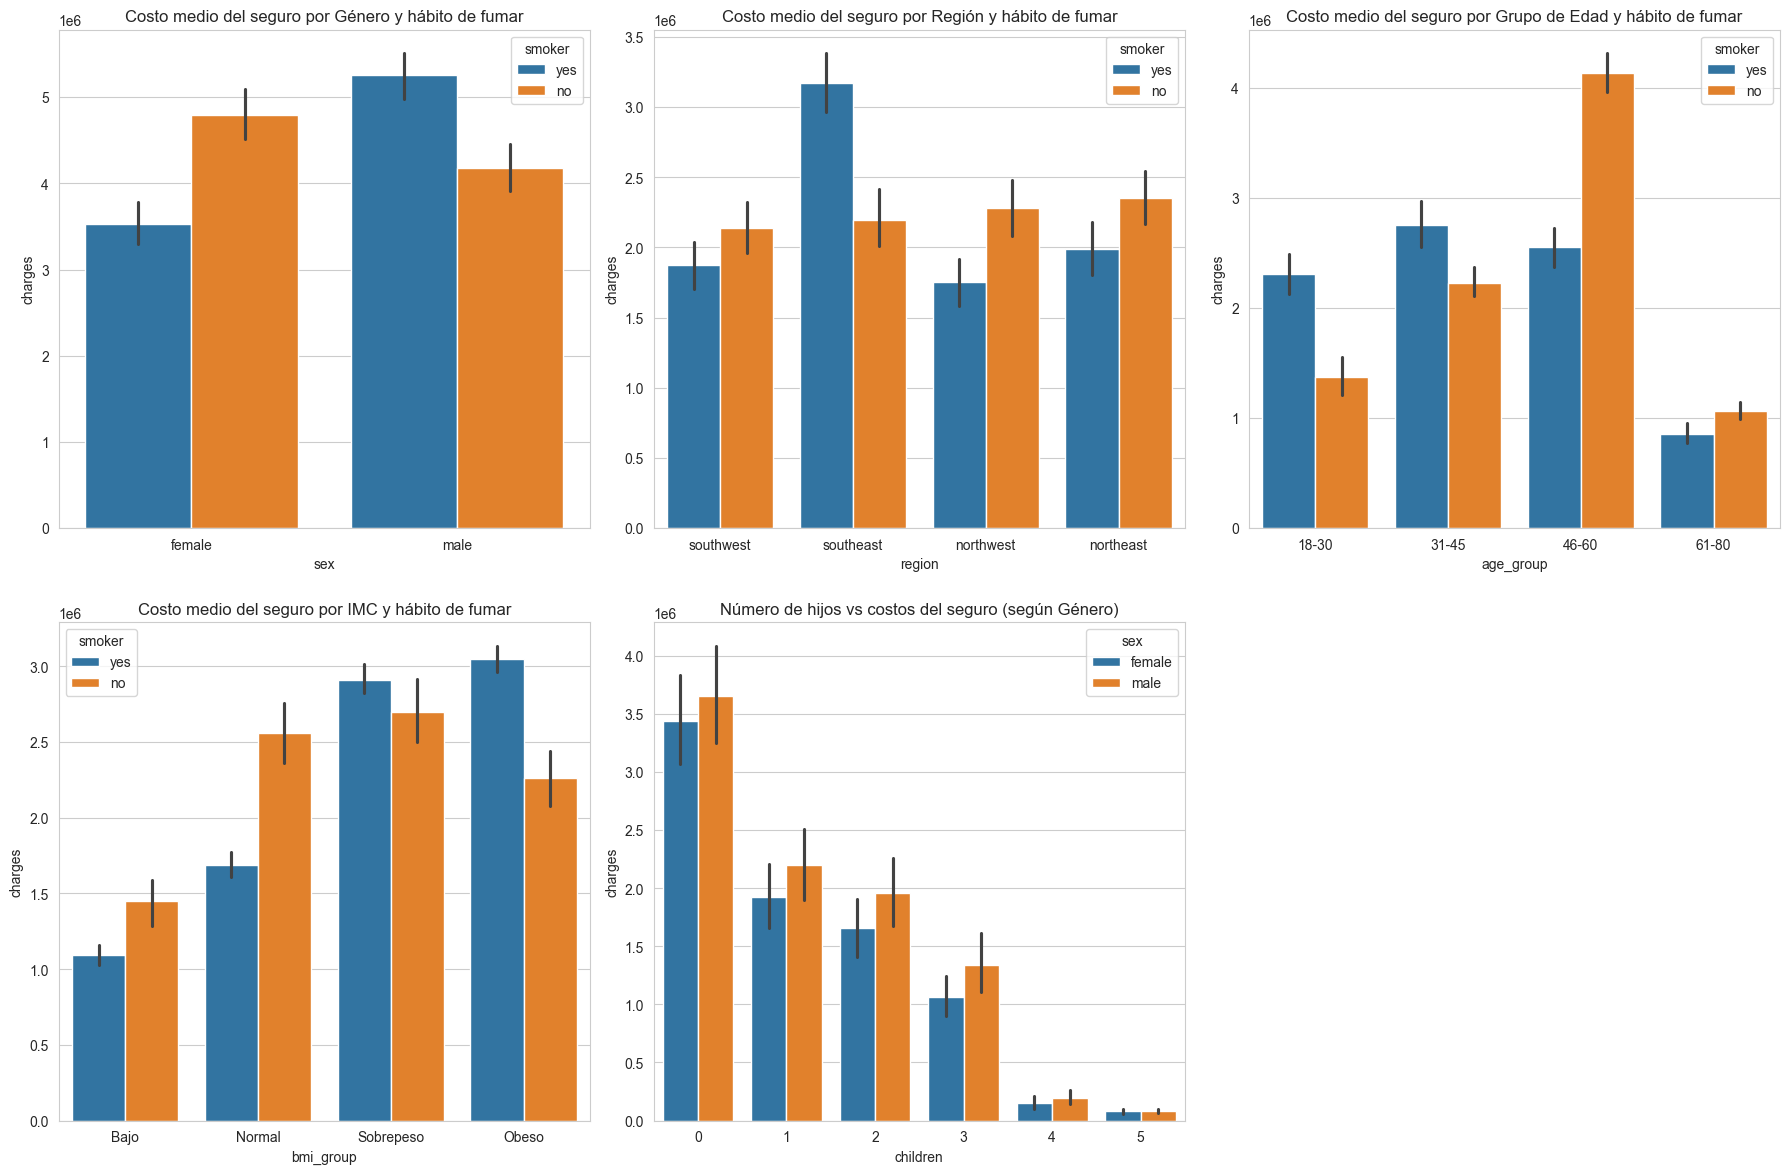

In [23]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.barplot(ax=axes[0, 0], data=total_data, x="sex", y="charges", hue="smoker", estimator=sum)
axes[0, 0].set_title("Costo medio del seguro por Género y hábito de fumar")

sns.barplot(ax=axes[0, 1], data=total_data, x="region", y="charges", hue="smoker", estimator=sum)
axes[0, 1].set_title("Costo medio del seguro por Región y hábito de fumar")

total_data["age_group"] = pd.cut(total_data["age"], bins=[18, 30, 45, 60, 80], labels=["18-30", "31-45", "46-60", "61-80"])
sns.barplot(ax=axes[0, 2], data=total_data, x="age_group", y="charges", hue="smoker", estimator=sum)
axes[0, 2].set_title("Costo medio del seguro por Grupo de Edad y hábito de fumar")

total_data["bmi_group"] = pd.cut(total_data["bmi"], bins=[15, 25, 30, 35, 50], labels=["Bajo", "Normal", "Sobrepeso", "Obeso"])
sns.barplot(ax=axes[1, 0], data=total_data, x="bmi_group", y="charges", hue="smoker", estimator=sum)
axes[1, 0].set_title("Costo medio del seguro por IMC y hábito de fumar")

sns.barplot(ax=axes[1, 1], data=total_data, x="children", y="charges", hue="sex", estimator=sum)
axes[1, 1].set_title("Número de hijos vs costos del seguro (según Género)")

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

De estos análisis podemos observar que:
- Los hombres fumadores pagan más de seguro médico que las mujeres fumadoras.
- Vemos como en función de la región tanto si eres fumador como si no los costes son distintos, destacando especialmente los costes en los fumadores del sudoeste.
- Los costos en los fumadores y no fumadores crecen de forma inversa (los fumadores pagan menos que los fumadores, cuando la tendencia por edad es la contrario) de los 40 a los 60 años, equilibrándose ligeramente de los 61 a los 80.
- Las personas que fuman y su índice de masa corporal es más alto (sobrepeso y obeso) pagan más.
- En cuanto a los hijos, las mujeres con hijos pagán más que los hombres con hijos, ajustándose más a partir de los 4 hijos.

##### Análisis de correlaciones

In [24]:
total_data.drop(["age_group","bmi_group"], axis = 1, inplace = True)
total_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
total_data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
import pandas as pd
import json

# Factorizar 'sex', 'smoker' y 'region'
total_data["sex_n"], sex_labels = pd.factorize(total_data["sex"])
total_data["smoker_n"], smoker_labels = pd.factorize(total_data["smoker"])
total_data["region_n"], region_labels = pd.factorize(total_data["region"])

# Crear diccionarios de transformación
sex_transformation_rules = {label: idx for idx, label in enumerate(sex_labels)}
smoker_transformation_rules = {label: idx for idx, label in enumerate(smoker_labels)}
region_transformation_rules = {label: idx for idx, label in enumerate(region_labels)}

# Guardar las reglas en archivos JSON
with open("sex_transformation_rules.json", "w") as f:
    json.dump(sex_transformation_rules, f)

with open("smoker_transformation_rules.json", "w") as f:
    json.dump(smoker_transformation_rules, f)

with open("region_transformation_rules.json", "w") as f:
    json.dump(region_transformation_rules, f)

# Mostrar los valores únicos transformados
print("Transformaciones aplicadas y guardadas en JSON.")
print("Sex:", sex_transformation_rules)
print("Smoker:", smoker_transformation_rules)
print("Region:", region_transformation_rules)


Transformaciones aplicadas y guardadas en JSON.
Sex: {'female': 0, 'male': 1}
Smoker: {'yes': 0, 'no': 1}
Region: {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}


In [27]:
total_data

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [28]:
column_list = total_data.columns.tolist()
print(column_list)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'sex_n', 'smoker_n', 'region_n']


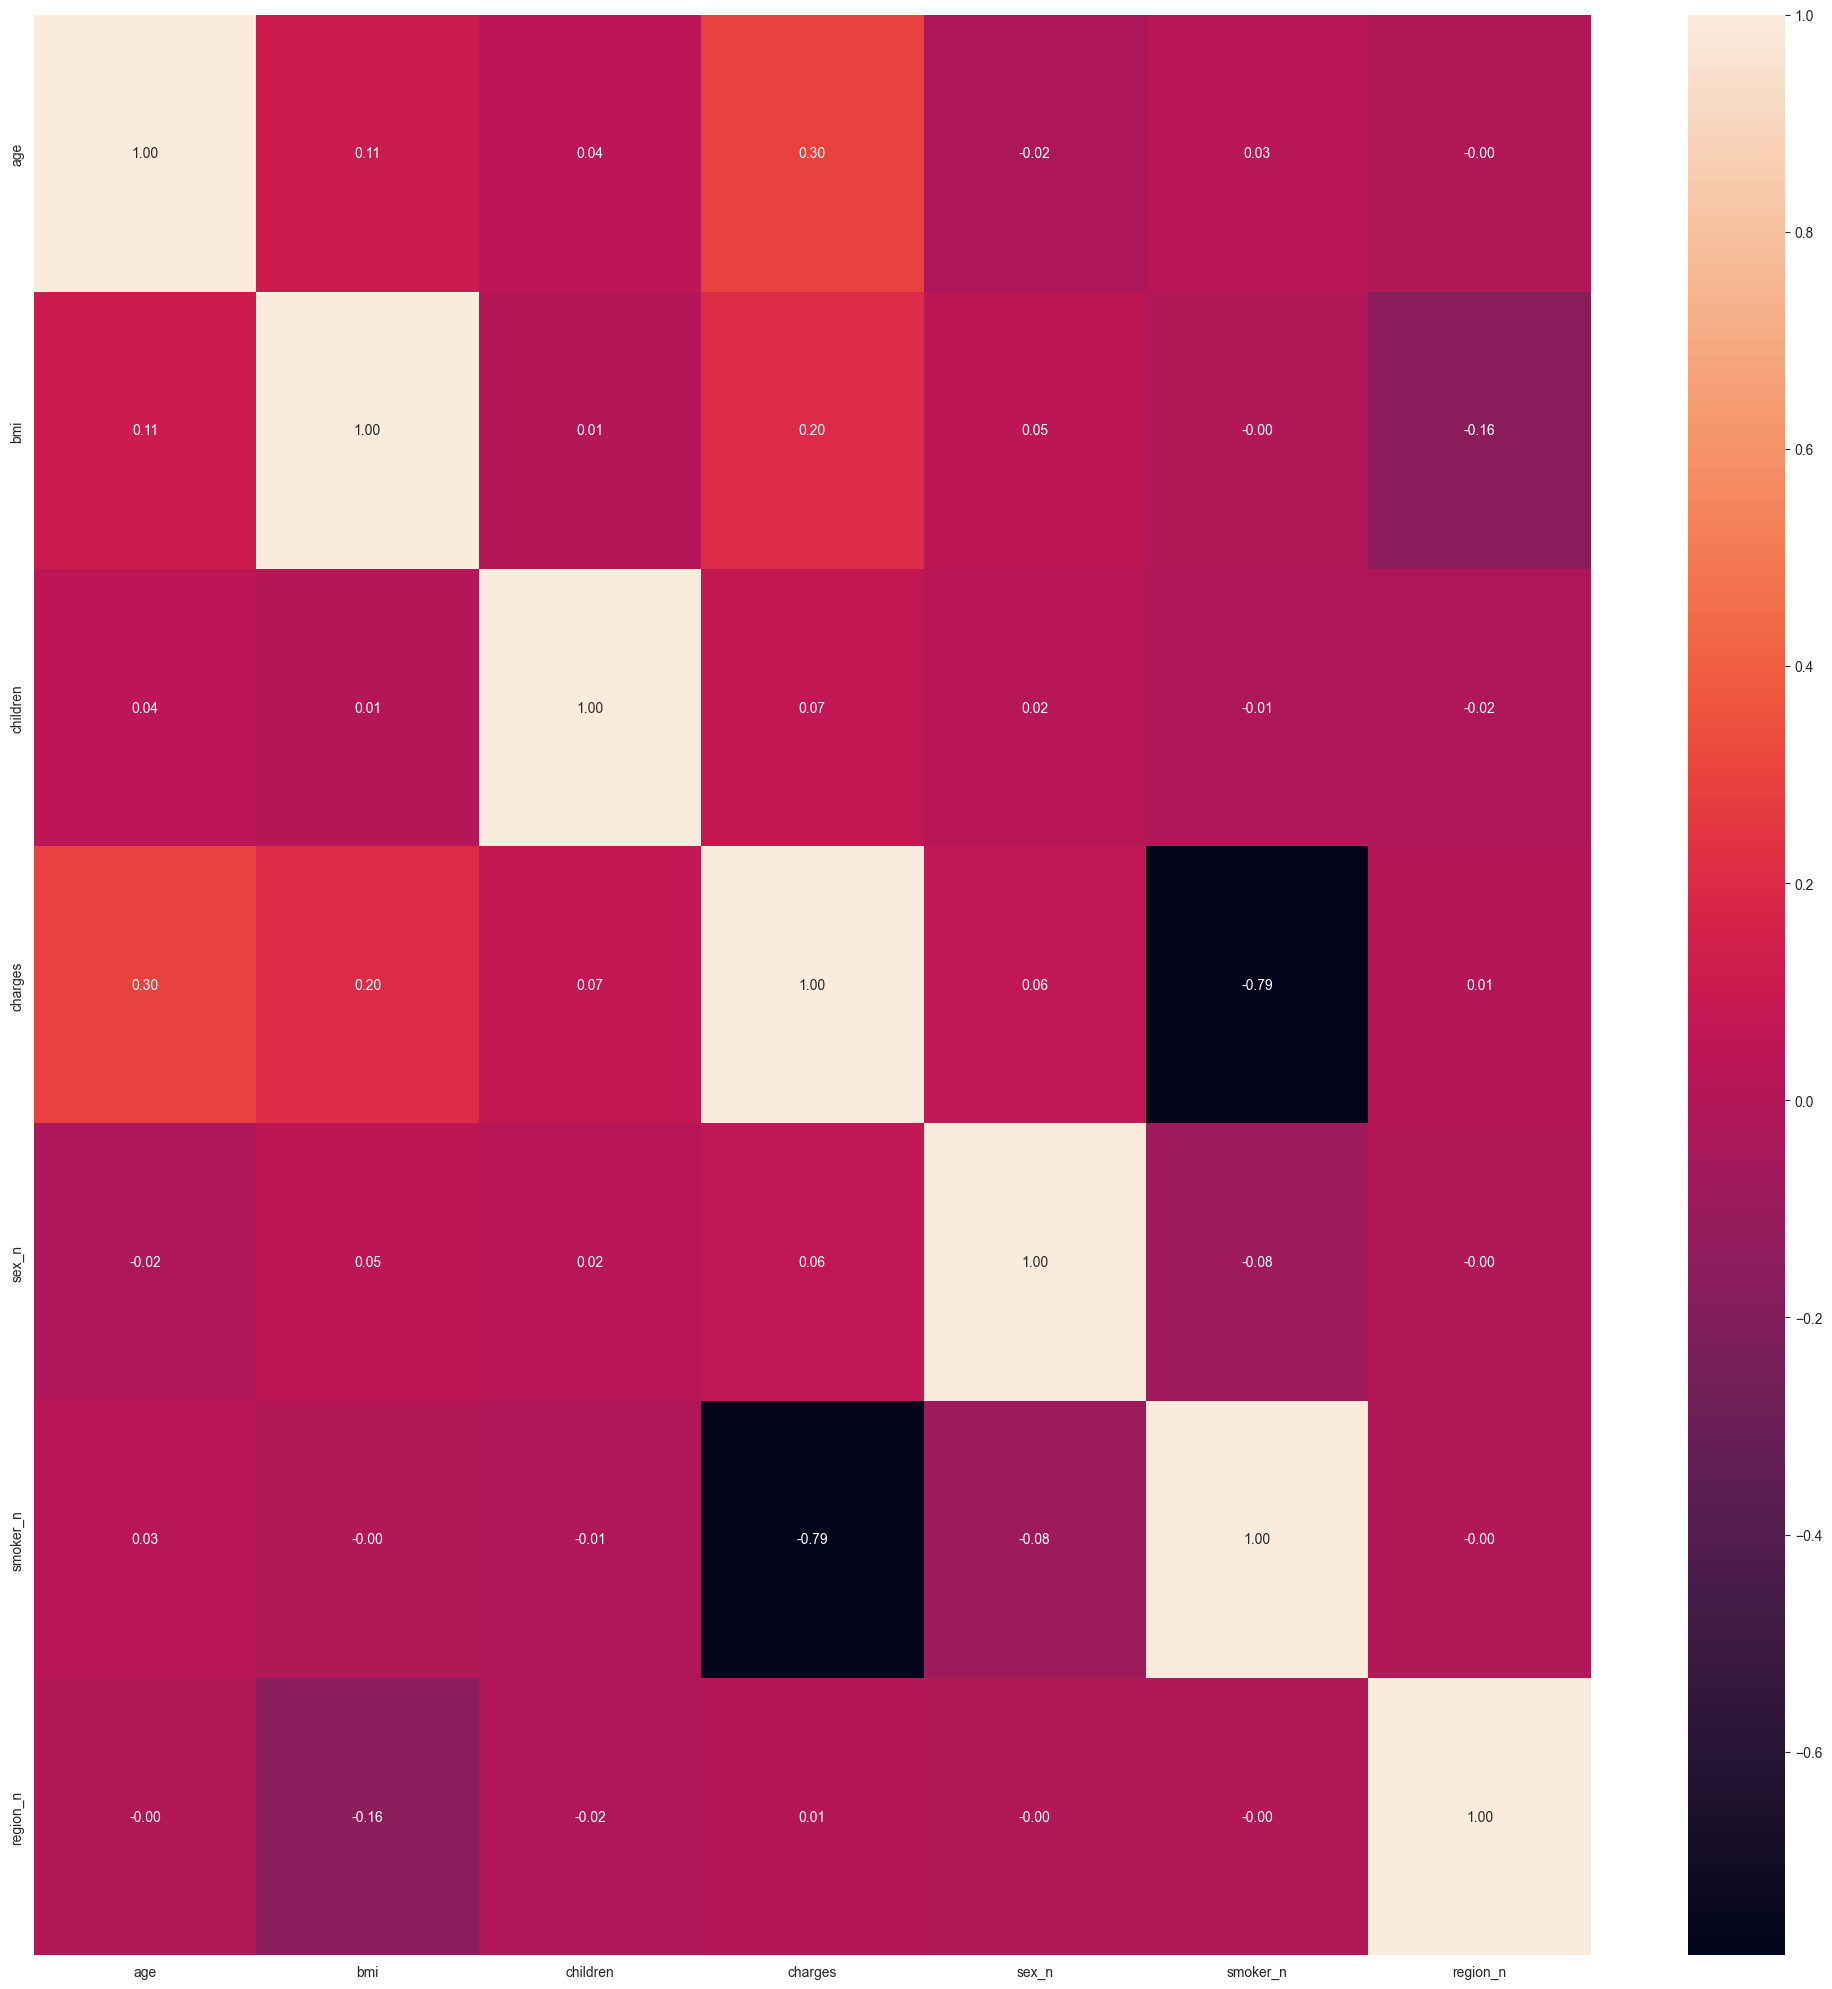

In [29]:
fig, axes = plt.subplots(figsize=(20, 20))

sns.heatmap(total_data[['age', 'bmi', 'children', 'charges', 'sex_n', 'smoker_n', 'region_n']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

- Observamos una relación elevada entre charges y smoker_n
- Observamos una relación media-baja entre bmi y charges y entre age y charges
- Observamos una relación baja entre bmi y region_n y entre bmi y age

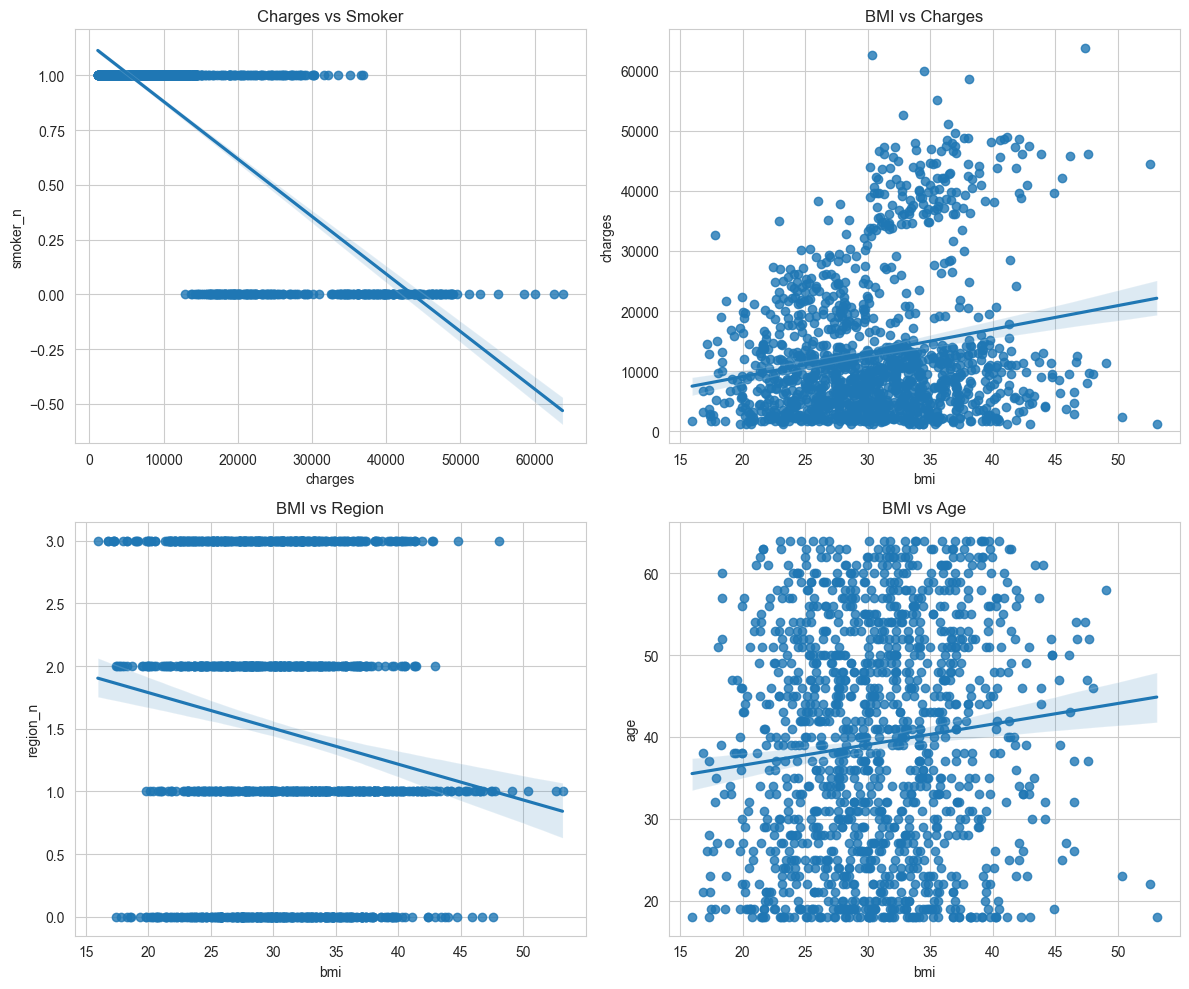

In [30]:
fig, axis = plt.subplots(figsize=(12, 10), nrows=2, ncols=2)

sns.regplot(ax=axis[0, 0], data=total_data, x="charges", y="smoker_n")
axis[0, 0].set_title("Charges vs Smoker")

sns.regplot(ax=axis[0, 1], data=total_data, x="bmi", y="charges")
axis[0, 1].set_title("BMI vs Charges")

sns.regplot(ax=axis[1, 0], data=total_data, x="bmi", y="region_n")
axis[1, 0].set_title("BMI vs Region")

sns.regplot(ax=axis[1, 1], data=total_data, x="bmi", y="age")
axis[1, 1].set_title("BMI vs Age")

plt.tight_layout()

plt.show()


- **Charges vs Smoker**: Se observa una clara relación negativa entre ser fumador y el costo del seguro. Los fumadores (smoker_n = 0) tienen primas de seguro mucho más altas, mientras que los no fumadores (smoker_n = 1) tienen primas más bajas.
- **BMI vs Charges**: Se aprecia una ligera relación positiva entre el índice de masa corporal (BMI) y el costo del seguro, aunque con bastante dispersión. Hay personas con BMI alto y costos bajos, lo que sugiere que el BMI por sí solo no es un predictor fuerte del costo del seguro.
- **BMI vs Region**: Parece que la distribución del BMI varía entre las regiones, pero no de manera muy pronunciada. La relación negativa sugiere que algunas regiones pueden tener un BMI promedio más alto o bajo.
- **BMI vs Age**: Existe una leve correlación positiva entre la edad y el BMI, lo que indica que en promedio, las personas mayores tienden a tener un BMI un poco más alto. Sin embargo, la dispersión es muy alta, por lo que la relación no es muy fuerte.

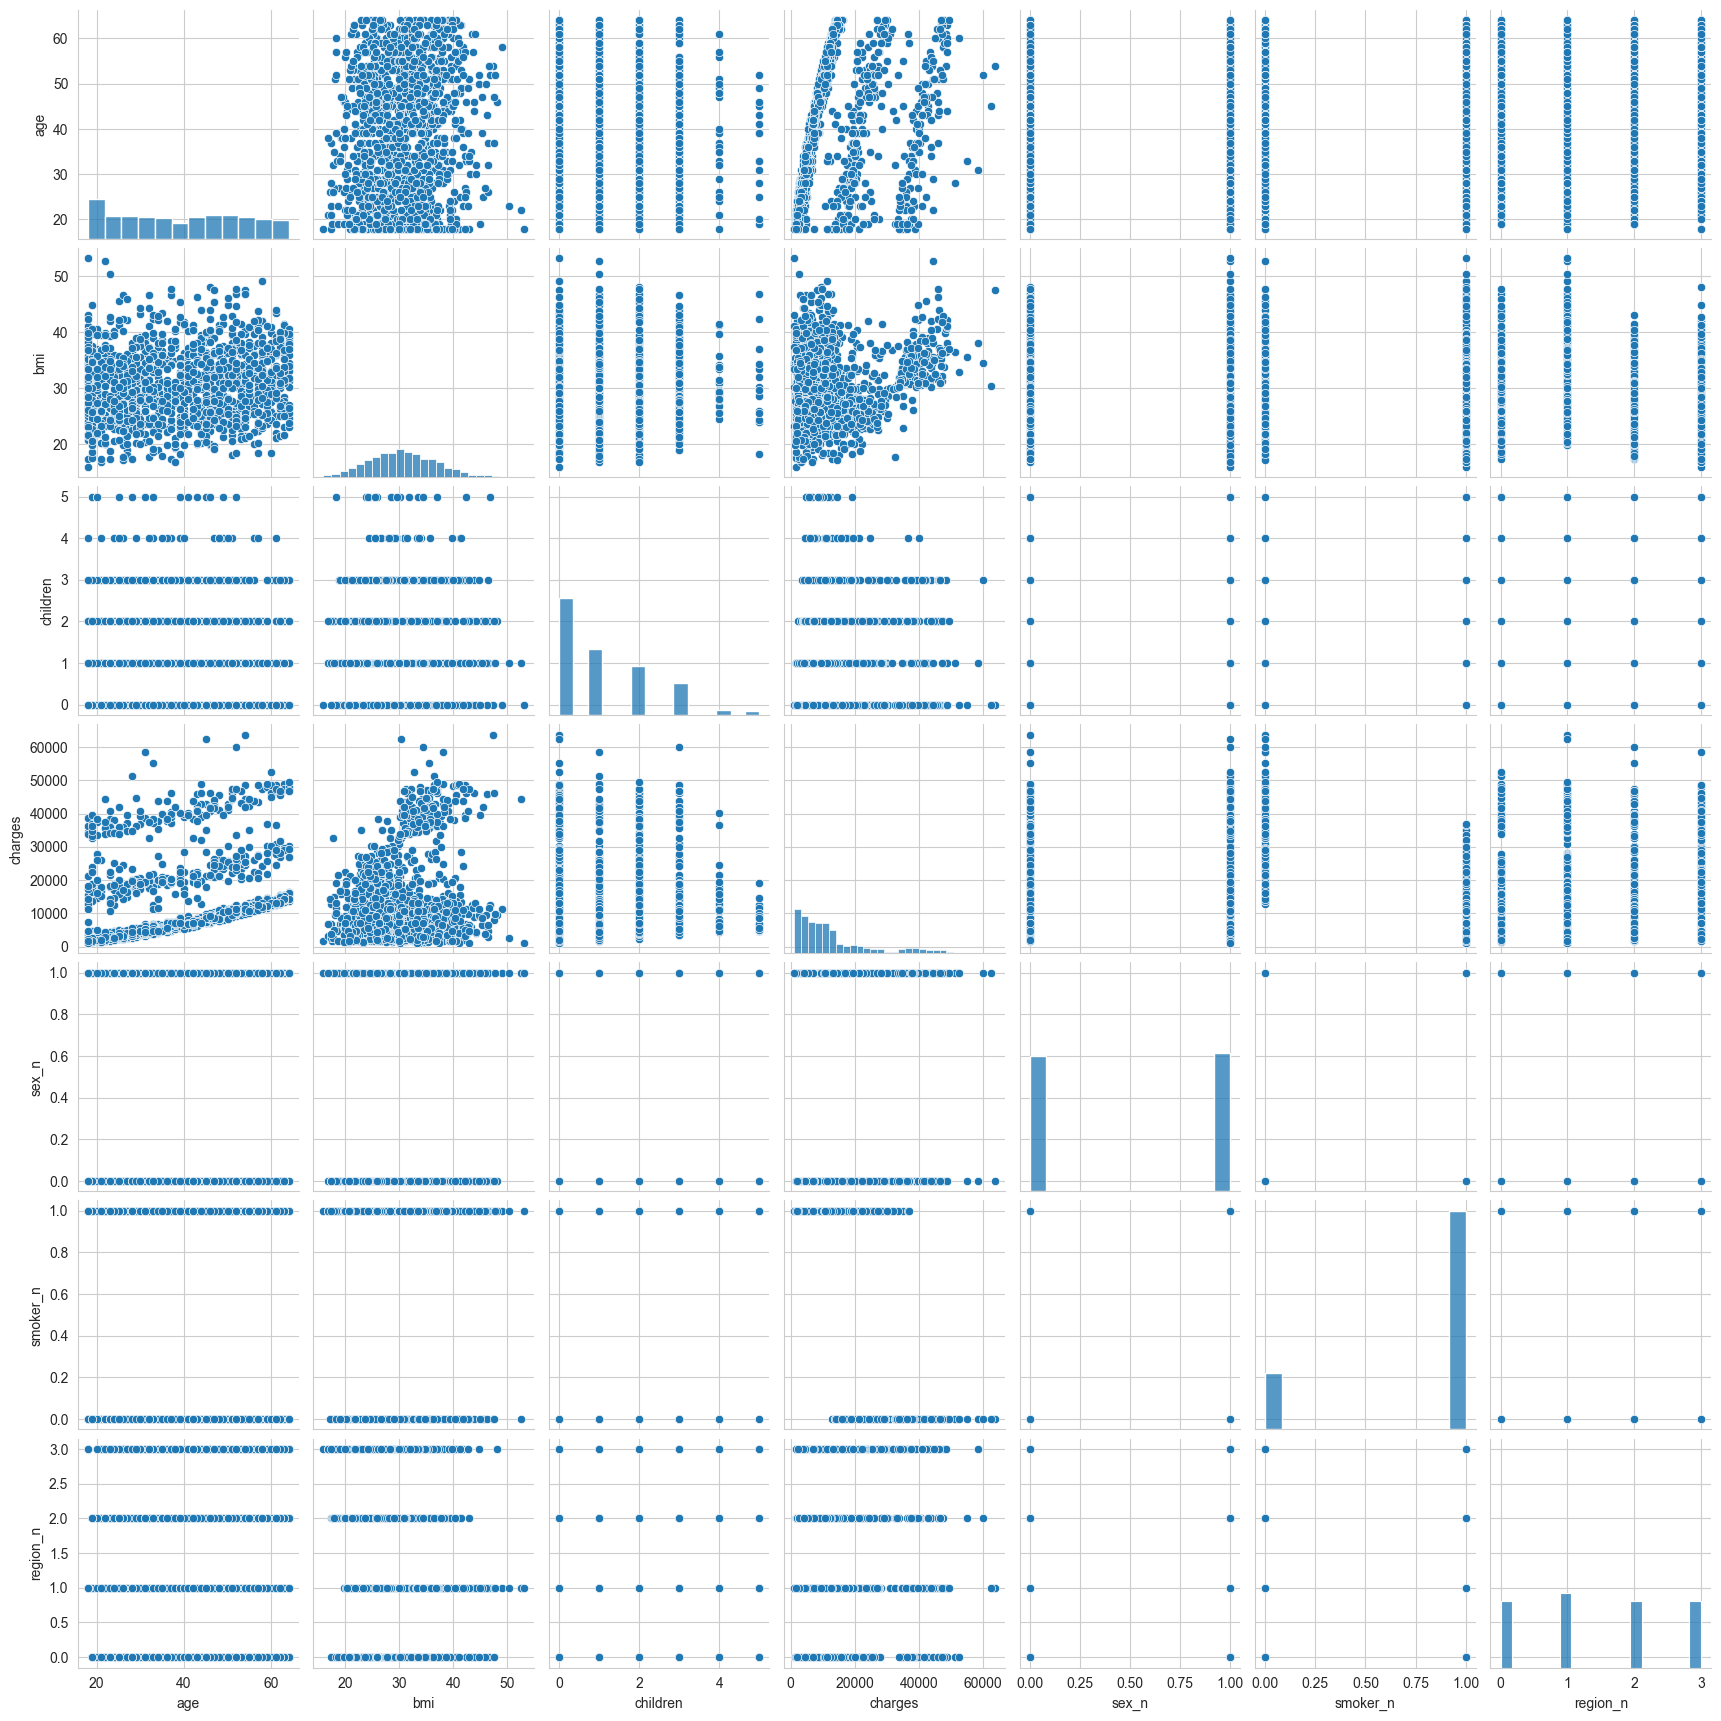

In [31]:
sns.pairplot(data = total_data)

### Paso 5: Ingeniería de características

#### Análisis de outliers

In [32]:
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


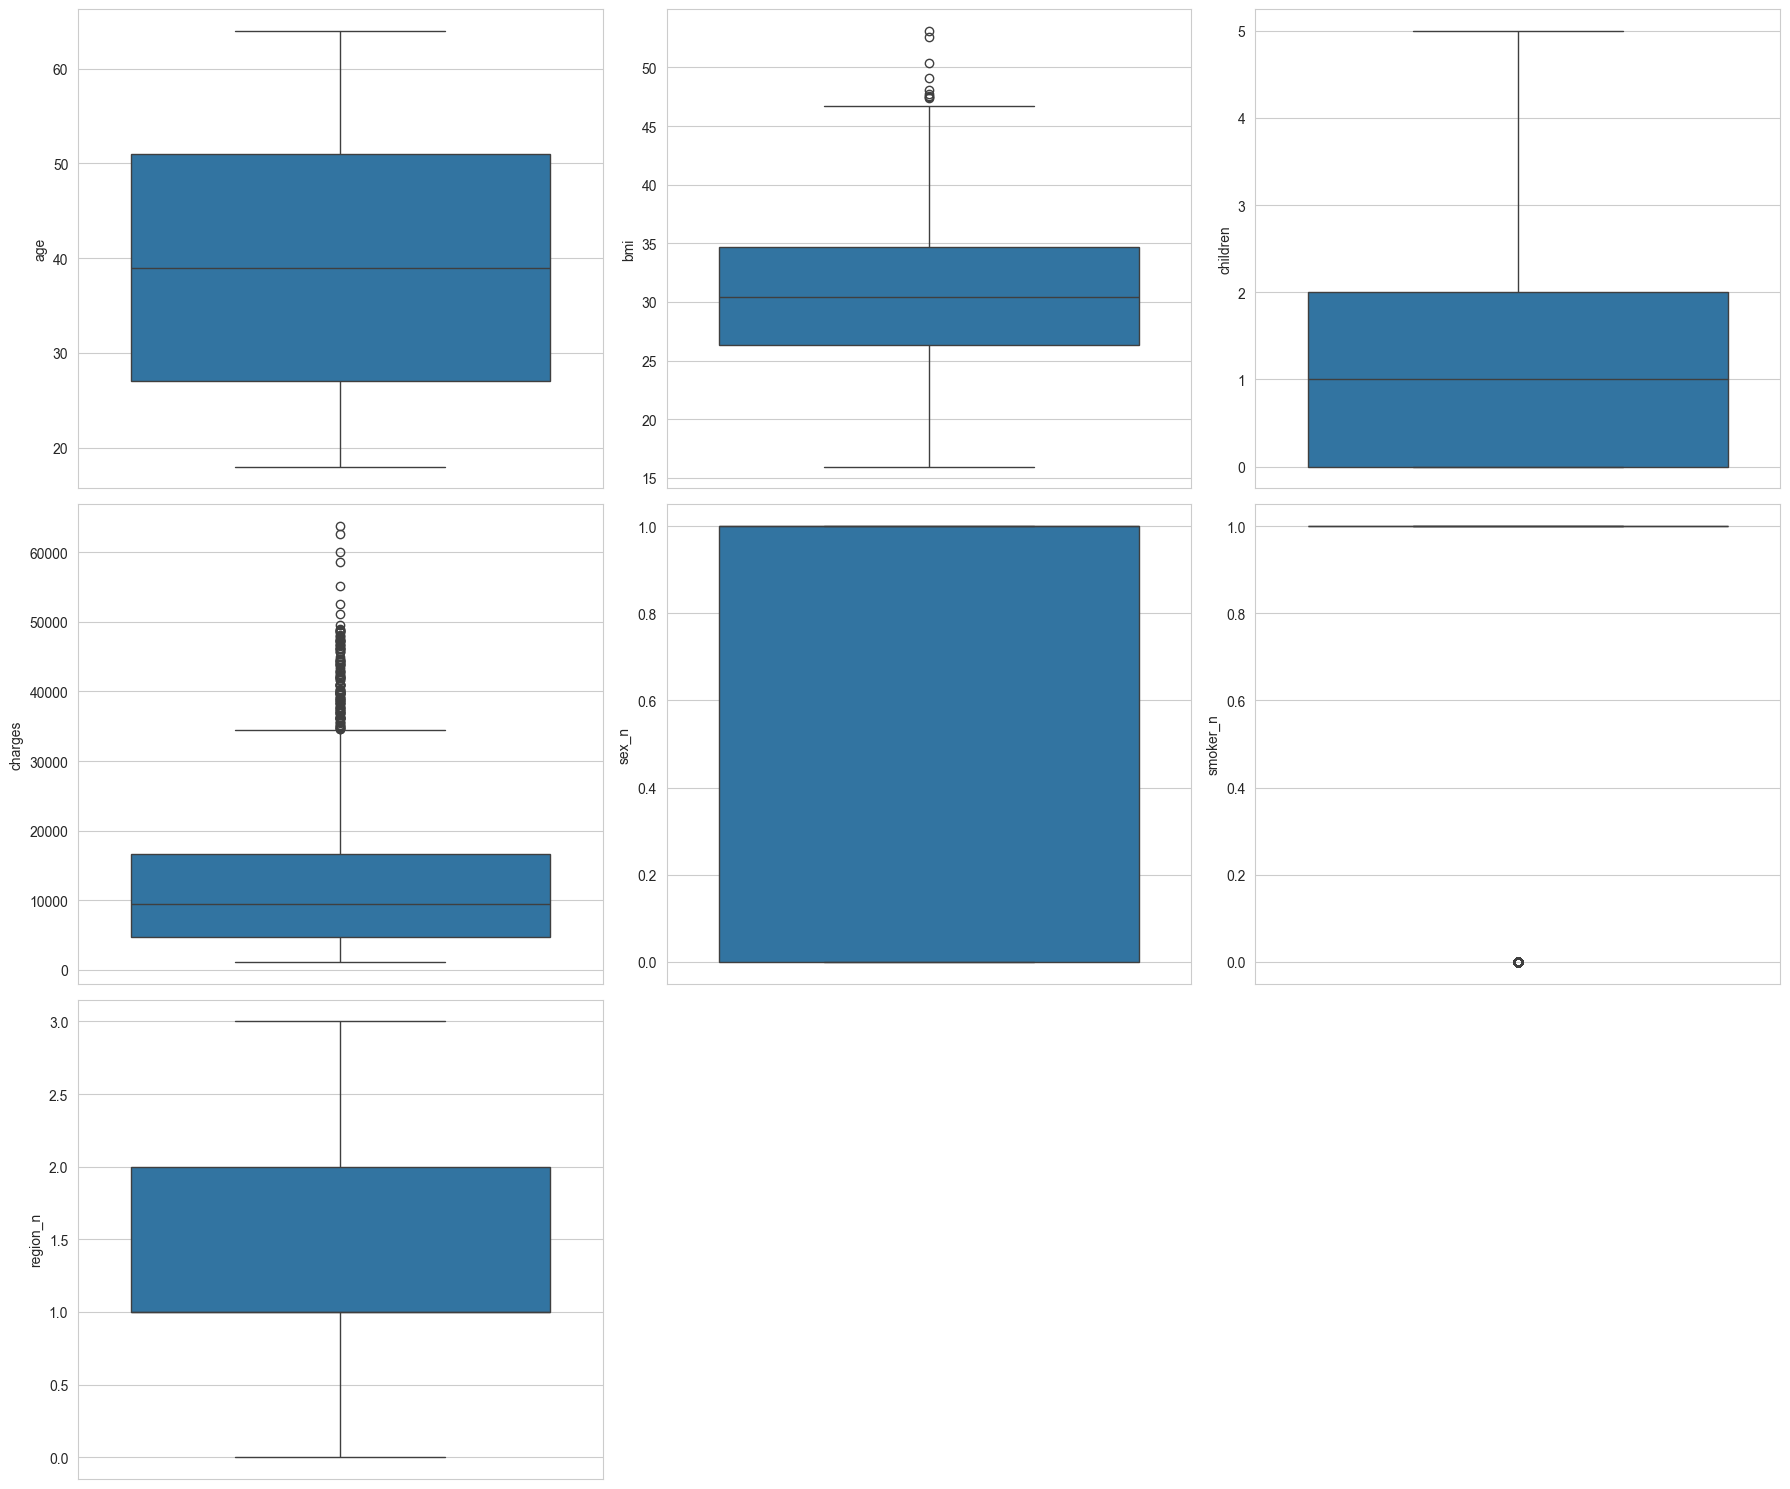

In [33]:
# Obtener las columnas numéricas del DataFrame
columns = total_data.select_dtypes(include=['number']).columns.tolist()

# Crear la figura y los ejes
num_rows = (len(columns) + 2) // 3  # Calcular el número de filas necesarias

#indicar número de columnas que deseas
num_cols = 3

fig, axis = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))

# Recorrer las columnas y asignarlas a los ejes
for i, col in enumerate(columns):
    row = i // num_cols  # Calcula la fila
    col_index = i % num_cols  # Calcula el índice de la columna
    sns.boxplot(ax=axis[row, col_index], data=total_data, y=col)

# Eliminar ejes vacíos si los hay
for j in range(len(columns), num_rows * num_cols):
    fig.delaxes(axis.flatten()[j])  # Elimina los ejes vacíos

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

- Las variables afectadas por outliers son: "bmi", "charges" y "smoker_n".

In [34]:
import json

total_data_con_outliers = total_data.copy()
total_data_sin_outliers = total_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0:
    lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["bmi", "charges"]:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("outliers_replacement.json", "w") as f:
   json.dump(outliers_dict, f)
outliers_dict

{'bmi': [np.float64(13.674999999999994), np.float64(47.31500000000001)],
 'charges': [1121.8739, np.float64(34524.777625)]}

In [35]:
total_data_sin_outliers

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


#### Análisis de valores faltantes

In [36]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

In [37]:
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

#### Escalado de valores

In [39]:
### ELEGIR LAS VARIABLES NUMÉRICAS (NO USAR LA TARGET)
num_variables = total_data.select_dtypes(include=['number']).columns.tolist()

# Si deseas filtrar específicamente algunas columnas, puedes hacerlo aquí.
# Por ejemplo, si quieres excluir algunas columnas específicas:
excluded_columns = ["charges"]  # Coloca aquí cualquier columna que quieras excluir

# Filtrar las columnas excluidas
num_variables = [col for col in num_variables if col not in excluded_columns]

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("charges", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("charges", axis = 1)[num_variables]
y = total_data_con_outliers["charges"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/y_train.xlsx", index = False)
y_test.to_excel("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/y_test.xlsx", index = False)

X_train_con_outliers.head()

,age,bmi,children,sex_n,smoker_n,region_n
1114,23,24.510,0,1,1,3
968,21,25.745,2,1,1,3
599,52,37.525,2,0,1,2
170,63,41.470,0,1,1,1
275,47,26.600,2,0,1,3


##### Normalización

In [40]:
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/X_test_sin_outliers_norm.xlsx", index = False)


##### Escalado Mínimo-Máximo

In [41]:
### ESCALAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n
1114,0.108696,0.230024,0.0,1.0,1.0,1.000000
968,0.065217,0.263250,0.4,1.0,1.0,1.000000
599,0.739130,0.580172,0.4,0.0,1.0,0.666667
170,0.978261,0.686306,0.0,1.0,1.0,0.333333
275,0.630435,0.286252,0.4,0.0,1.0,1.000000


### Paso 6: Selección de características

In [42]:
# Con un valor de k = 4 (podemos elegir cualquier otro valor) decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train_con_outliers_scal, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers_scal), columns = X_train_con_outliers_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers_scal), columns = X_test_con_outliers_scal.columns.values[ix])

# GUARDO X_train_sel.columns
import json

with open("feature_selection_k_5.json", "w") as f:
  json.dump(X_train_sel.columns.tolist(), f)

X_train_sel.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,children,sex_n,smoker_n,region_n
0,0.0,1.0,1.0,1.000000
1,0.4,1.0,1.0,1.000000
2,0.4,0.0,1.0,0.666667
3,0.0,1.0,1.0,0.333333
4,0.4,0.0,1.0,1.000000


In [43]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)
X_train_sel.to_csv("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/clean_train.csv", index = False)
X_test_sel.to_csv("/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels/clean_test.csv", index = False)

In [44]:
BASE_PATH = "/Users/jesus/Desktop/4geeks/4geeks - linear regresion/linear-regresion-machine-learning-python-template/models/excels"
TRAIN_PATHS = [
    "X_train_con_outliers.xlsx",
    "X_train_sin_outliers.xlsx",
    "X_train_con_outliers_norm.xlsx",
    "X_train_sin_outliers_norm.xlsx",
    "X_train_con_outliers_scal.xlsx",
    "X_train_sin_outliers_scal.xlsx"
]
TRAIN_DATASETS = []
for path in TRAIN_PATHS:
    TRAIN_DATASETS.append(
        # pd.read_excel(BASE_PATH + "/" + path)
        pd.read_excel(f"{BASE_PATH}/{path}")
        # pd.read_excel(os.path.join(BASE_PATH, path))
    )

TEST_PATHS = [
    "X_test_con_outliers.xlsx",
    "X_test_sin_outliers.xlsx",
    "X_test_con_outliers_norm.xlsx",
    "X_test_sin_outliers_norm.xlsx",
    "X_test_con_outliers_scal.xlsx",
    "X_test_sin_outliers_scal.xlsx"
]
TEST_DATASETS = []
for path in TEST_PATHS:
    TEST_DATASETS.append(
        pd.read_excel(f"{BASE_PATH}/{path}")
    )

y_train = pd.read_excel(f"{BASE_PATH}/y_train.xlsx")
y_test = pd.read_excel(f"{BASE_PATH}/y_test.xlsx")

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

results = []
for index, dataset in enumerate(TRAIN_DATASETS):
    print(f"Entrenando dataset {index}...")

    # Inicializar modelo de regresión
    model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
    
    # Entrenar el modelo
    model.fit(dataset, y_train)
    
    # Predicciones
    y_pred_train = model.predict(dataset)
    y_pred_test = model.predict(TEST_DATASETS[index])

    # Calcular métricas de regresión
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    # Guardar resultados
    results.append(
        {
            "train_mse": train_mse,
            "test_mse": test_mse,
            "train_r2": train_r2,
            "test_r2": test_r2
        }
    )

# Mostrar resultados
results


Entrenando dataset 0...
Entrenando dataset 1...
Entrenando dataset 2...
Entrenando dataset 3...
Entrenando dataset 4...
Entrenando dataset 5...


[{'train_mse': 37005531.72811555,
  'test_mse': 35493102.61165053,
  'train_r2': 0.7297182858804965,
  'test_r2': 0.8068466322629111},
 {'train_mse': 36992599.00185515,
  'test_mse': 35467636.63842712,
  'train_r2': 0.7298127441752071,
  'test_r2': 0.8069852180198291},
 {'train_mse': 37005531.72811554,
  'test_mse': 35493102.61165054,
  'train_r2': 0.7297182858804965,
  'test_r2': 0.8068466322629111},
 {'train_mse': 36992599.00185514,
  'test_mse': 35467636.638427176,
  'train_r2': 0.7298127441752071,
  'test_r2': 0.8069852180198287},
 {'train_mse': 37005531.72811555,
  'test_mse': 35493102.6116505,
  'train_r2': 0.7297182858804965,
  'test_r2': 0.8068466322629113},
 {'train_mse': 36992599.00185515,
  'test_mse': 35467636.63842708,
  'train_r2': 0.7298127441752071,
  'test_r2': 0.8069852180198294}]

In [46]:
df_results = pd.DataFrame(results)

# Calcular RMSE
df_results["train_rmse"] = np.sqrt(df_results["train_mse"])
df_results["test_rmse"] = np.sqrt(df_results["test_mse"])

# Seleccionar columnas relevantes para mostrar en tabla
df_results = df_results[["train_rmse", "test_rmse", "train_r2", "test_r2"]]

# Mostrar tabla
print(df_results)

    train_rmse    test_rmse  train_r2   test_r2
0  6083.217219  5957.608800  0.729718  0.806847
1  6082.154142  5955.471152  0.729813  0.806985
2  6083.217219  5957.608800  0.729718  0.806847
3  6082.154142  5955.471152  0.729813  0.806985
4  6083.217219  5957.608800  0.729718  0.806847
5  6082.154142  5955.471152  0.729813  0.806985


In [47]:
total_data["charges"].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

- Los datasets 1, 3 y 5 tienen los mejores valores de MSE y r2. No obstante, el valor de RMSE es excesivamente alto (es aproximadamente la mitad de la media). Esto nos da a entender que quizás el modelo no es el adecuado para este problema.
- Lo importante es conseguir un bajo MSE y un alto r2.